# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [23]:
import pandas as pd
sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

lines= sales[sales['sales']>=10]
print(lines)
duemila_18= sales[sales['year']==2018]
print(duemila_18)
duemila_18_13= sales[(sales['year']==2018) & (sales['sales']>=13)]
print(duemila_18_13)
df=sales[~((sales['year']==2018) & (sales['sales']>=13))]
print(df)
print('========================')
nomi=sales[sales['employee']>'J']
print(nomi)


  employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020
  employee  sales  year
0  Katrina     14  2018
3    Roman     12  2018
  employee  sales  year
0  Katrina     14  2018
     employee  sales  year
1      Guanyu     17  2019
2         Jan      6  2020
3       Roman     12  2018
4  Jacqueline      8  2020
5       Paola      3  2019
6   Esperanza      7  2019
7      Alaina     15  2020
8      Egweyn      5  2020
     employee  sales  year
0     Katrina     14  2018
2         Jan      6  2020
3       Roman     12  2018
4  Jacqueline      8  2020
5       Paola      3  2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
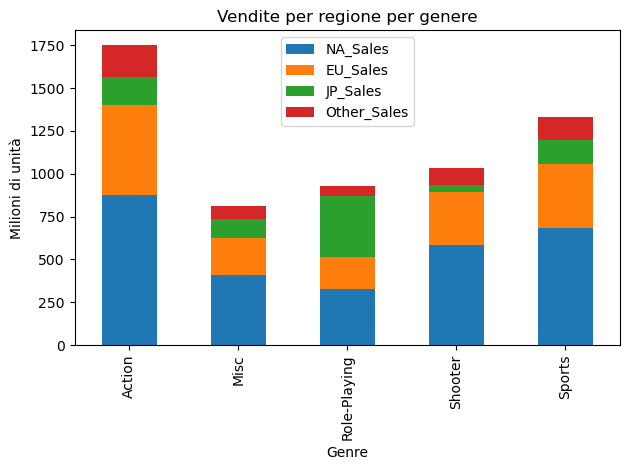


In [8]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
# 1. quanti videogiochi sono stati publicati
print('il numero di videogiochi publicati è:', len(df['Name'].unique()))
df.columns


il numero di videogiochi publicati è: 11493


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

<Axes: xlabel='Genre'>

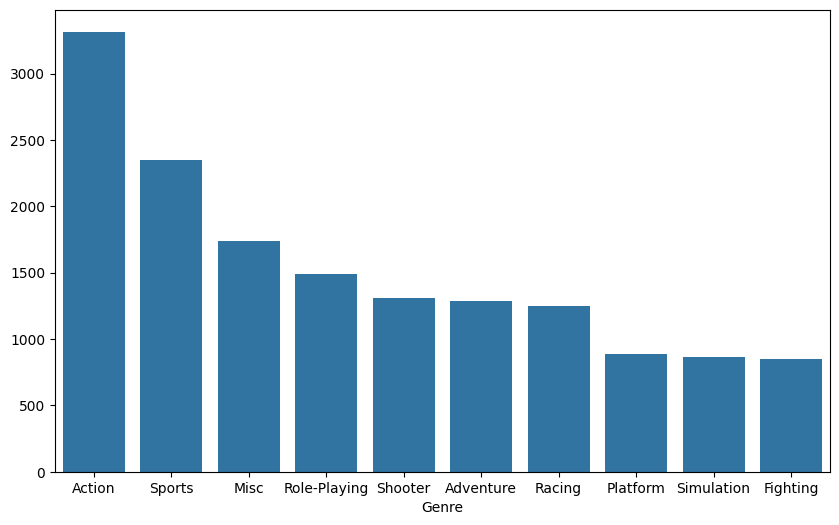

In [14]:
# 2. quali sono il generi piu popolari?

generi_popolari = df['Genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=generi_popolari.index, y=generi_popolari.values)

<Axes: xlabel='Year'>

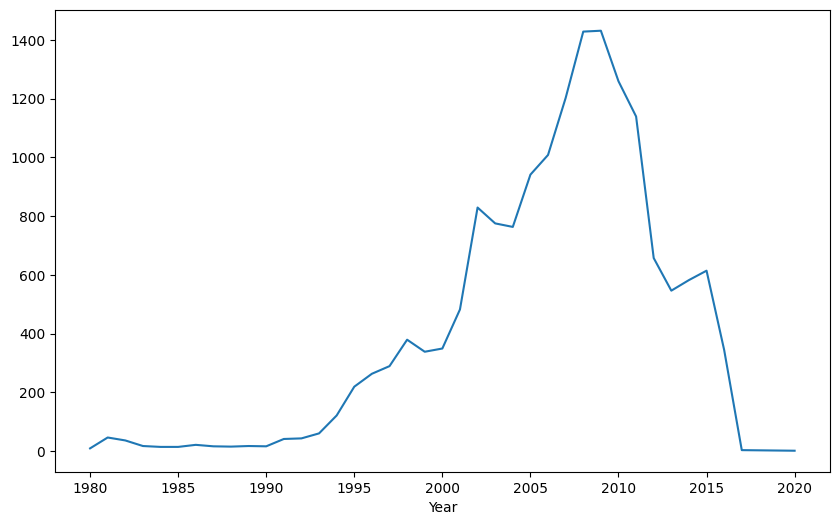

In [17]:
# 3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
years=df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=years.index, y=years.values)

4. Prova a riprodurre questo plot 
![image.png](attachment:image.png)

<Figure size 1000x600 with 0 Axes>

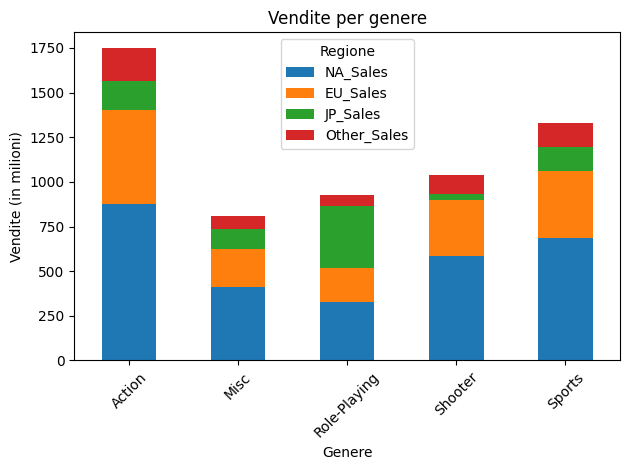

In [25]:
df.columns
generi_p=df.groupby('Genre')['Name'].count().sort_values(ascending=False).head(5)
best_sellers=df[df['Genre'].isin(generi_p.index)].groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize=(10, 6))
best_sellers.plot(stacked= True, kind='bar')
plt.title('Vendite per genere')
plt.xlabel('Genere')
plt.ylabel('Vendite (in milioni)')
plt.xticks(rotation=45)
plt.legend(title='Regione')
plt.tight_layout()